<h1><center>
Household Pulse Survey (COVID-19) 
</center></h1>

# Introduction

[Data source](https://www.google.com/url?q=https://www.census.gov/programs-surveys/household-pulse-survey/datasets.html%23phase1)


[Household Pulse Survey Questionnaire (In Field Beginning September 14, 2022)](https://www2.census.gov/programs-surveys/demo/technical-documentation/hhp/Phase_36_Household_Pulse_Survey_ENGLISH.pdf)
The U.S. Census Bureau, in collaboration with multiple federal agencies, designed The Household Pulse Survey to measure the social and economic effects of coronavirus on American households. The Household Pulse Survey is a 20-minute online survey studying how the coronavirus pandemic is impacting households across the country from a social and economic perspective.Data will be disseminated in near real-time to inform federal and state response and recovery planning. 

Phase 1 began on April 23, 2020 and ended on July 21, 2020. Data collection began on April 23, 2020, conducted by an internet questionnaire. Data was with links sent by email to 1,867,126 email addresses. The combined response from week one and two generated 74,413 complete and sufficient partial interviews.
On May 7, 2020, the second weekly sample was released combing households with completed interviews from the initial sample with new households for a total of 1,048,950 households. This second sample, also marked the addition of the capacity to invite survey responses through text messaging. The cases now include up to five email addresses, and up to five cellular telephone numbers. Initial contact plans for the second sample specified contacting the previously interviewed households by whichever means they identified as their preferred method and contact. Between May 7 and May 12, 2020 another 41,996 interviews were collected.
Data is accessible from the U.S. Census Bureau’s Experimental Data webpage tables, interactive data tools, and microdata .


In phase 1, the following attributes are collected: 
- Basic demographics
    - Age, sex, race, Hispanic origin, marital status, educational attainment
- Employment questions
    - Employment and employment income (BLS/Census) 
    - Spending source of funds (BLS)
- Food security questions
    - Past and current food sufficiency (USDA-ERS)
    - Free meals (USDA-ERS)
    - Money spent on groceries and prepared foods (USDA-ERS)
- Health questions
    - Overall health (NCHS)
    - Mental health (NCHS)
    - Health insurance (NCHS/Census)
    - Access and delays in health care (NCHS)
- Housing questions
    - Tenure (HUD)
    - Rent and mortgage current payment status (HUD) Confidence about paying rent/mortgage next month (HUD)
- Education questions
    - Effects of COVID on how K-12 children received education (NCES)
    - Access to computer/digital device and internet availability (NCES)
    - Time spent with teachers, spent on educational activities, and studying (NCES)   


Codebook for ordinal variables: 
- Age 
1. 18 - 29
2. 30 - 39
3. 40 - 49
4. 50 - 59
5. 60 - 69
6. 70 - 79
7. 80 and above   

Education
Less than a high school diploma
High school diploma or GED
Some college/associate's degree
Bachelor's degree or higher

Household income
Less than $25,000
$25,000 - $34,999
$35,000 - $49,999 
$50,000 - $74,999 
$75,000 - $99,999 
$100,000 - $149,999 
$150,000 - $199,999
$200,000 and above
Did not report

Health status
Excellent
Very good
Good
Fair
Poor
Did not report

Frequency of feeling nervous, anxious, or on edge
Not at all	Several days	More than half the days	Nearly every day	Did not report

Frequency of not being able to stop or control worrying				
Not at all	Several days	More than half the days	Nearly every day	Did not report

Frequency of having little interest or pleasure in doing things				
Not at all	Several days	More than half the days	Nearly every day	Did not report

Frequency of feeling down, depressed, or hopeless				
Not at all	Several days	More than half the days	Nearly every day	Did not report
    
The overarching questions guiding our analysis:
- What type of households are more likely to experience mental health challneges? 
<!-- TODO: add more-->
- 

In [2]:
### standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# allows you to view the plots upon executing your code
%matplotlib inline
# sets the plotting style, feel free to change!
plt.style.use('fivethirtyeight')
# prevents histogram bars to fuse together
plt.rcParams["patch.force_edgecolor"] = True
import seaborn as sns
import warnings
# ignores warning message
warnings.filterwarnings('ignore')
# change max column display option
pd.options.display.max_columns = 50

# Data and Data Exploration

In [30]:
# read in data
df = pd.read_csv('./pulse2020_puf_01.csv')
print('(rows, columns): '+str(df.shape))
# columns
df.columns


(rows, columns): (74413, 82)


Index(['SCRAM', 'WEEK', 'EST_ST', 'EST_MSA', 'PWEIGHT', 'TBIRTH_YEAR',
       'ABIRTH_YEAR', 'EGENDER', 'AGENDER', 'RHISPANIC', 'AHISPANIC', 'RRACE',
       'ARACE', 'EEDUC', 'AEDUC', 'MS', 'THHLD_NUMPER', 'AHHLD_NUMPER',
       'THHLD_NUMKID', 'AHHLD_NUMKID', 'THHLD_NUMADLT', 'WRKLOSS', 'EXPCTLOSS',
       'ANYWORK', 'KINDWORK', 'RSNNOWRK', 'UNEMPPAY', 'PRIFOODSUF',
       'CURFOODSUF', 'FOODSUFRSN1', 'FOODSUFRSN2', 'FOODSUFRSN3',
       'FOODSUFRSN4', 'FOODSUFRSN5', 'FREEFOOD', 'WHEREFREE1', 'WHEREFREE2',
       'WHEREFREE3', 'WHEREFREE4', 'WHEREFREE5', 'WHEREFREE6', 'WHEREFREE7',
       'TSPNDFOOD', 'TSPNDPRPD', 'FOODCONF', 'HLTHSTATUS', 'ANXIOUS', 'WORRY',
       'INTEREST', 'DOWN', 'HLTHINS1', 'HLTHINS2', 'HLTHINS3', 'HLTHINS4',
       'HLTHINS5', 'HLTHINS6', 'HLTHINS7', 'HLTHINS8', 'DELAY', 'NOTGET',
       'TENURE', 'MORTLMTH', 'MORTCONF', 'ENROLL1', 'ENROLL2', 'ENROLL3',
       'TEACH1', 'TEACH2', 'TEACH3', 'TEACH4', 'TEACH5', 'COMPAVAIL', 'COMP1',
       'COMP2', 'COMP3', 'INT

In [4]:
# Drop meaningless columns 
df.drop(['THHLD_NUMADLT', 'RSNNOWRK', 'FOODSUFRSN1','FOODSUFRSN2','FOODSUFRSN3','FOODSUFRSN4',
                'FOODSUFRSN5', 'FREEFOOD','WHEREFREE1','WHEREFREE2','WHEREFREE3','WHEREFREE4',
                'WHEREFREE5','WHEREFREE6','WHEREFREE7','TEACH1','TEACH2','TEACH3','TEACH4','TEACH5',
                'MORTCONF','COMPAVAIL', 'COMP1','ABIRTH_YEAR', 'AGENDER', 'AHISPANIC', 'ARACE', 'AEDUC',
              'COMP2', 'COMP3', 'INTRNTAVAIL', 'INTRNT1', 'INTRNT2', 'INTRNT3','INTRNTAVAIL','MORTCONF',
             'TSCHLHRS', 'TTCH_HRS','AHHLD_NUMPER','AHHLD_NUMKID'], axis=1, inplace=True)
             
            

In [5]:
#combined ANYWORK and KINDWORK as one categorical variable Employment status

#6 categories: 5 sector of employment + unemployed
# 1) Government
# 2) Private company
# 3) Non-profit organization including tax exempt and charitable organizations
# 4) Self-employed
# 5) Working in a family business
# 6) unemployed
cols = ['ANYWORK', 'KINDWORK']
df['EMPSTATUS'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df = df.replace({'EMPSTATUS' : { '1_2':2, '2_-88':6, '1_3':3, '1_1':1, '1_4':4, '1_5':5, '1_-99':np.nan, '-99_-88':np.nan}})


In [11]:
#replace floats?
df['EMPSTATUS']

0        2.0
1        6.0
2        3.0
3        6.0
4        3.0
        ... 
74408    2.0
74409    1.0
74410    3.0
74411    6.0
74412    6.0
Name: EMPSTATUS, Length: 74413, dtype: float64

In [36]:
# combine HLTHINS columns
HLTHINS_cols =  df.columns[df.columns.str.startswith('HLTHINS')]
HLTHINS_cols
df[HLTHINS_cols]


,HLTHINS1,HLTHINS2,HLTHINS3,HLTHINS4,HLTHINS5,HLTHINS6,HLTHINS7,HLTHINS8,HLTHINS
0,1,2,2,2,2,2,2,2,1
1,2,2,1,2,2,2,2,-99,1
2,1,2,2,2,2,2,2,2,1
3,2,2,2,2,2,2,2,1,1
4,1,2,2,2,2,2,2,2,1
...,...,...,...,...,...,...,...,...,...
74408,1,2,2,2,2,2,2,1,1
74409,1,2,1,2,2,2,2,-99,1
74410,1,-99,-99,-99,-99,-99,-99,-99,1
74411,1,2,2,2,2,2,2,2,1


In [37]:
df['HLTHINS'] = df[HLTHINS_cols].astype(str).agg('-'.join, axis=1)
df['HLTHINS'].head(17)

0                     1-2-2-2-2-2-2-2-1
1                   2-2-1-2-2-2-2--99-1
2                     1-2-2-2-2-2-2-2-1
3                     2-2-2-2-2-2-2-1-1
4                     1-2-2-2-2-2-2-2-1
5       1--99--99--99--99--99--99--99-1
6                     1-1-2-2-2-2-2-2-1
7                     1-2-2-2-2-2-2-2-1
8                     2-2-2-1-2-2-2-2-1
9                     1-2-2-2-2-2-2-2-1
10                    1-2-2-2-2-2-2-2-1
11                  2-2-1-2--99-1-2-2-1
12        1--99-1--99--99--99--99--99-1
13        1--99-1--99--99--99--99--99-1
14        1--99--99--99--99-1--99--99-1
15                    1-2-2-2-2-2-2-2-1
16    -88--88--88--88--88--88--88--88-2
Name: HLTHINS, dtype: object

In [38]:
hasOne = df["HLTHINS"].str.contains("1")
#1 --> has at least 1 insurance
df["HLTHINS"] = np.where(hasOne, "1", df["HLTHINS"])
#2 --> no "1" in any column, meaning no insurance
df["HLTHINS"] = np.where(~hasOne, "2", df["HLTHINS"])

In [39]:
#1: insured
#2: uninsured
df = df.replace({'HLTHINS' : { '1':1, '2':2}})

In [40]:
df["HLTHINS"].unique()

array([1, 2])

In [24]:
df['EST_MSA']
df.drop('EST_MSA', axis=1, inplace=True)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
74408   NaN
74409   NaN
74410   NaN
74411   NaN
74412   NaN
Name: EST_MSA, Length: 74413, dtype: float64

In [67]:
#create overall indication of mental health (mental health columns 32. 1 best 4 worst) 
# add them up to create an ordinal score of 4 - 16 to measure overall mental health
mh_cols = ['ANXIOUS', 'WORRY','INTEREST', 'DOWN']
#weights can be changed
weights = [[1],[1],[1],[1]]

#df['MH_STATUS'] = df[mh_cols].sum(axis=1)
df['MH_STATUS'] = df[mh_cols].apply(lambda row: row*weights[0]).sum(axis=1)
df['MH_STATUS']

0        18
1        30
2         8
3        32
4        14
         ..
74408    28
74409    12
74410    12
74411    16
74412     8
Name: MH_STATUS, Length: 74413, dtype: int64

In [20]:

#replace missing income buckets with mode
df = df.replace({'INCOME' : { -99:df['INCOME'].mode(),-88:df['INCOME'].mode()}})
df['INCOME'].unique()

array([4, 2, 8, 1, 6, 5, 3, 7])

In [42]:
#create a column for the mean of TSPNDFOOD of that income group
df['IMEAN_TSPNDFOOD'] = df.groupby(['INCOME'])['TSPNDFOOD'].transform('mean') 
cols = ['INCOME','TSPNDFOOD','IMEAN_TSPNDFOOD']
df[cols]


,INCOME,TSPNDFOOD,IMEAN_TSPNDFOOD
0,4,100,163.393496
1,2,30,150.789431
2,8,150,244.202452
3,1,100,151.492202
4,4,150,163.393496
...,...,...,...
74408,5,0,174.145901
74409,-99,50,62.160377
74410,5,80,174.145901
74411,8,200,244.202452


In [43]:
#replace missing values with average instead of 0 
# (use household income category average as predicator for food spending) 
df = df.replace({'TSPNDFOOD' : { -99:df['IMEAN_TSPNDFOOD'], -88:df['IMEAN_TSPNDFOOD']}})

In [44]:
#mean of TSPNDPRPD of that income group
df['IMEAN_TSPNDPRPD'] = df.groupby(['INCOME'])['TSPNDPRPD'].transform('mean') 
df = df.replace({'TSPNDPRPD' : { -99:df['IMEAN_TSPNDPRPD'], -88:df['IMEAN_TSPNDPRPD']}})
#df['TSPNDPRPD'][df['TSPNDPRPD']==-88]


In [45]:
#add TSPNDFOOD, TSPNDPRPD columns together to create one variable: household money spent on food in last 7 days
# replacing missing values with 0s
# df['TSPNDFOOD'][df['TSPNDFOOD'] < 0] = np.nan
# df['TSPNDPRPD'][df['TSPNDPRPD'] < 0] = np.nan
df['FOODCOST'] = df['TSPNDFOOD'] + df['TSPNDPRPD']

In [46]:
df['FOODCOST']

0        160.0
1         30.0
2        200.0
3        200.0
4        165.0
         ...  
74408     30.0
74409     80.0
74410    115.0
74411    270.0
74412    200.0
Name: FOODCOST, Length: 74413, dtype: float64

In [50]:
#combine TENURE and MORTLMTH columns as one categorical variable: 
# 3 categories: 
# 1. Owned or occupied no payment
# 2. rent or mortgage payment on time
# 3. rent or mortgage payment late, 
cols = ['TENURE', 'MORTLMTH']
df['HOUSESTATUS'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
#use mode to replace missing values
df = df.replace(
    {'MORTLMTH' : { -99:df['MORTLMTH'].mode(), -88:df['MORTLMTH'].mode()},
    'TENURE' : { -99:df['TENURE'].mode(), -88:df['TENURE'].mode()}

})
df['HOUSESTATUS'].unique()

array(['3_1', '2_1', '2_3', '2_2', '1_1', '3_2', '4_1', '3_3'],
      dtype=object)

In [51]:
df = df.replace({'HOUSESTATUS' : { '3_1':2, '2_1':2, '2_3':3, '2_2':2, '1_1':1, 
       '3_2':3, '4_1':1, '3_3':3}})

In [52]:
df['HOUSESTATUS'].unique()

array([2, 3, 1])

In [53]:
#combine ENROLL1,ENROLL2,ENROLL3 columns into one categorical variable: 
# 1. children enrolled in school, 
# 2. homeschooled, 
# 3. not enrolled in school
cols = ['ENROLL1','ENROLL2','ENROLL3']
df['CHILDENROLL'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df['CHILDENROLL'].unique()
df = df.replace({'CHILDENROLL' : {'1.0_nan_nan': 1, 'nan_nan_nan':np.nan, 'nan_nan_1.0':3, 'nan_1.0_nan':2, '1.0_1.0_nan':np.nan
        }})

In [54]:
# get the list of columns that contain missing values 
missing_cols = [col for col in df.columns if (-99 in df[col].unique() or -88 in df[col].unique())]
print(missing_cols)

for col in missing_cols:
    df[col] = df[col].replace(-99, np.nan)
    df[col] = df[col].replace(-88, np.nan)

['MS', 'WRKLOSS', 'EXPCTLOSS', 'ANYWORK', 'KINDWORK', 'RSNNOWRK', 'UNEMPPAY', 'PRIFOODSUF', 'CURFOODSUF', 'FOODSUFRSN1', 'FOODSUFRSN2', 'FOODSUFRSN3', 'FOODSUFRSN4', 'FOODSUFRSN5', 'FREEFOOD', 'WHEREFREE1', 'WHEREFREE2', 'WHEREFREE3', 'WHEREFREE4', 'WHEREFREE5', 'WHEREFREE6', 'WHEREFREE7', 'FOODCONF', 'HLTHSTATUS', 'ANXIOUS', 'WORRY', 'INTEREST', 'DOWN', 'HLTHINS1', 'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7', 'HLTHINS8', 'DELAY', 'NOTGET', 'MORTCONF', 'ENROLL1', 'ENROLL2', 'ENROLL3', 'TEACH1', 'TEACH2', 'TEACH3', 'TEACH4', 'TEACH5', 'COMPAVAIL', 'COMP1', 'COMP2', 'COMP3', 'INTRNTAVAIL', 'INTRNT1', 'INTRNT2', 'INTRNT3', 'TSCHLHRS', 'TTCH_HRS', 'INCOME']


In [ ]:
# transform the birth year into age  
df["AGE"] = 2022 - df['TBIRTH_YEAR'] 
df["AGE"]


0        36
1        67
2        46
3        58
4        59
         ..
74408    49
74409    66
74410    67
74411    40
74412    76
Name: AGE, Length: 74413, dtype: int64

In [ ]:
#transform age into age groups 
# 1. 18 - 29
# 2. 30 - 39
# 3. 40 - 49
# 4. 50 - 59
# 5. 60 - 69
# 6. 70 - 79
# 7. 80 and above 
bins= [0,19,30,40,50,60,70,80,1000]
labels = [0,1,2,3,4,5,6,7]
df['AGEGROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)
df['AGEGROUP']


0        2
1        5
2        3
3        4
4        4
        ..
74408    3
74409    5
74410    5
74411    3
74412    6
Name: AGEGROUP, Length: 74413, dtype: category
Categories (8, int64): [0 < 1 < 2 < 3 < 4 < 5 < 6 < 7]

In [ ]:

#Majority of the columns are categorical, with number encoding. 
# Create dictionaries to have easy access to the descriptive categories. 
# If categorical variables are ordinal, we probably want to keep that order for visualization. 
# A lot of the binary variables should be recoded: instead of using 2 to represent No, 
# let’s use 0 as a more conventional way.
# 
item = [1,2]
s=df.where(df.isin(item)).columns

binary_cols = [col for col in s if df[col].value_counts().index.size== 2 ]
print(binary_cols)

# instead of using 2 to represent No, let’s use 0 as a more conventional way. 

for col in binary_cols:
    df[col] = df[col].replace(2, 0)
    # convert variable types
    df[col] = df[col].astype('category')    



['ABIRTH_YEAR', 'EGENDER', 'AGENDER', 'RHISPANIC', 'AHISPANIC', 'ARACE', 'AEDUC', 'AHHLD_NUMPER', 'AHHLD_NUMKID', 'WRKLOSS', 'EXPCTLOSS', 'ANYWORK', 'HLTHINS1', 'HLTHINS2', 'HLTHINS3', 'HLTHINS4', 'HLTHINS5', 'HLTHINS6', 'HLTHINS7', 'HLTHINS8', 'DELAY', 'NOTGET']


## EDA and Visualizations


In order to explore all the variables effeciently, we create grouped column names for easy access.
- demographic: Age, Sex, Hispanic origin and Race, Education, Marital status
- socioeconomic: Household size, Presence of children under 18 years old, Household income, Used in the last 7 days to meet spending needs
<!-- specify them esp since they're categorical -->
- health: Health status,Delay getting medical care because of the COVID-19 pandemic, Need medical care for something unrelated to COVID-19, but did not get it
<!-- TODO -->
- employment
- food security and housing
- children and school
- internet access

We also create two dictionaries to translate the number code for the ordinal variables. This is useful for adding informative labels in plots.

In [ ]:
# variable names by group
demographic = ['TBIRTH_YEAR', 'EGENDER', 'RHISPANIC', 'EEDUC', 'MS']
socioeconomic = ['THHLD_NUMPER', 'THHLD_NUMKID',  'INCOME', 'SPNDSRC1']
health = ['HLTHSTATUS', 'DELAY', 'NOTGET', 'ANXIOUS', 'WORRY', 'INTEREST', 'DOWN']

#dictionaries
edu_dict = {1:'Less than a high school diploma', 2:'Less than a high school diploma',
            3:'High school diploma or GED', 4:"Some college/associate's degree",
            5:"Some college/associate's degree",
            6:"Bachelor's degree or higher",
            7:"Bachelor's degree or higher"}

income_dict = {1:'Less than $25,000', 
             2:'$25,000 - $34,999', 3:'$35,000 - $49,999', 
             4: '$50,000 - $74,999', 5:'$75,000 - $99,999', 
             6:'$100,000 - $149,999',7:'$150,000 - $199,999',8:'$200,000 and above',
              'MISSING VALUES':'Did not report',
            }
health_dict = {1:'Excellent', 
             2:'$25,000 - $34,999', 3:'$35,000 - $49,999', 
             4: '$50,000 - $74,999', 5:'$75,000 - $99,999'}

mh_dict = {1:'Not at all', 
             2:'Several days', 3:'More than half the days', 
             4: 'Nearly every day', 'MISSING VALUES':'Did not report',
            }

            
            

Looking at the summary statistics of all personality measures, it is clear that these measurements are standardized as z-scores with mean 0 and standard deviation 1.

In [ ]:
# summary stats for numerical variables EXCEPT FOR MS BC "MISSING VALUES"
df[demographic].describe()

,TBIRTH_YEAR,EEDUC,MS
count,74413.000000,74413.000000,73869.000000
mean,1969.065136,5.199589,2.209411
std,15.681818,1.462415,1.597008
min,1932.000000,1.000000,1.000000
25%,1956.000000,4.000000,1.000000
50%,1970.000000,6.000000,1.000000
75%,1982.000000,6.000000,3.000000
max,2002.000000,7.000000,5.000000


Next, we creat a function to plot a pie chart for a categorical demographic variable to represent percetage makeup. 

In [ ]:
def demo_plot(df=df, col='EGENDER'):
    '''
    a function to visualize demographic makeup
    input: 
    df is the datafram
    col is the column name
    output is piechart with percentage of each category for a given demographic variable
    '''
    series_plot = df[col].value_counts().sort_index()
    series_plot.plot(kind='pie', autopct='%1.1f%%', title=col+' distribution').set_ylabel('');

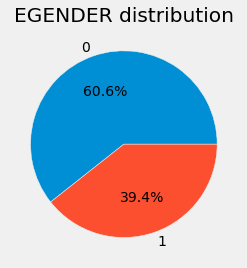

In [ ]:
# gender distribution
demo_plot()
# age distribution
#demo_plot(col='TBIRTH_YEAR')
# country of residence distribution
#demo_plot(col='Country')
# race and ethnicity distribution
#demo_plot(col='Ethnicity')
# education level distribution
#demo_plot(col='Education')

[I HAVEN'T WORKED ON THINGS BELOW YET]
Summary of demographics of the respondents:
- balanced in gender
- unbalanced in age, education and country:
    - about 60% of age < 35
    - 45% with university degree or higher
    - 55% from UK, and 30% from US
- extremely unbalanced in ethinicity:
    - more than 90% white

Next, we want to create an aggregated dataframe where each column is a drug, row index are the 7 categories of drug consumption, and the values are count of respondents corresponding to that drug and category. The goal here is to quickly identify the most consumed drugs based on the survey data.

In [ ]:
# create a empty dataframe
drug_agg = pd.DataFrame()
# loop over all the columns in drugs group
for col in drugs:
    # add column to the empty dataframe
    # column name is col
    # column content is the value counts of col
    drug_agg[col] = drug[col].value_counts().sort_index()

drug_agg.fillna(0, inplace=True)
drug_agg

NameError: name 'drugs' is not defined

By aggregating the counts for each type of drugs into the 7 categories of consumption, it is clear that the most consumed drugs are the legal ones, as we expected.
- consumption in descending order for "used in last day":
     1. Caffeine
     2. Chocolate
     3. Nicotine
     4. Alcohol
     5. Cannabis
     
We create a bar chart for these legal durg consumptions for comparison. The most consumed drug is CAFFEINE of course!

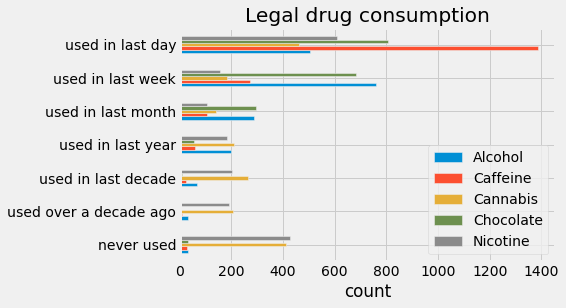

In [ ]:
# pick my legal drugs to plot
legal_drugs = ['Alcohol','Caffeine','Cannabis','Chocolate','Nicotine']
# bar chart for each legal drug
drug_agg[legal_drugs].plot(kind='barh', title='Legal drug consumption').set_xlabel('count')
# fix the label to be informative
plt.yticks(np.arange(7), ['never used', 'used over a decade ago', 'used in last decade', 'used in last year', 'used in last month', 'used in last week', 'used in last day']);

# Methods and Models

## Hypothesis testing

We are particularly interested in comparing personality measurements between male and female. We create a function that can implement the A/B testing and output results. Based on testing results, we conclude that male and female have significantly different personality measurements on average.

In [ ]:
def demo_pers_plot(df=drug, pers='Impulsive', demo='Gender'):
    '''A function to create boxplot to compare a personality score
        among demographic groups
    '''
    title = pers+' personality score by '+demo
    sns.boxplot(data=df, x=demo, y=pers).set(title=title)

In [ ]:
def AB_testing(df=drug, pers='Impulsive', demo='Gender', A='Female', B='Male', 
               reject_dir='both', alpha=95, rep=1000):
    '''
    function to conduct A/B testing based on a given categorical variable
    and subcategories to define the A and B groups, 
    then compare the average personality measurement for the two groups
    Inputs: 
        - pers: needs to be one of the columns in the list of personality: 
        ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
        - demo: needs to be one of the columns in the list of demographic:
        ['Age', 'Gender', 'Education', 'Country', 'Ethnicity']
        - A and B: need to be two of the values corresponding to the demo column
          for example, male and female for gender, UK and US for country, etc
        where the order of A and B should follow alphabetical order
        - reject_dir: specify the direction of the tail to reject the null hypothesis
          notice the difference is always calculated by Group A - Group B
          so reject_tail should be:
          left if Group A < Group B
          right if Group A > Group B
          both if just Group A and B are different
        - alpha: significance level
    Output: results based on permutation test and p-value
    '''
    # select columns and rows
    df = df.loc[(df[demo].isin([A, B])), [demo, pers]]
    # group by demo and aggregate by mean
    group_tb = df.groupby(by=demo).mean()
    print("Comparing means of:")
    print(group_tb)
    obs_diff = group_tb.iloc[0, 0] - group_tb.iloc[1, 0]
    
    simu_diffs = []

    for i in np.arange(rep):
        # shuffle group label
        shuffled_label = np.random.permutation(df[demo])
        shuffled_df = df[[pers]]
        shuffled_df['shuffled'] = shuffled_label
        shuffled_group_tb = shuffled_df.groupby(by='shuffled').mean()
        # calculated simulated diff
        diff = shuffled_group_tb.iloc[0, 0] - group_tb.iloc[1, 0]
        # append one simulated diff
        simu_diffs = np.append(simu_diffs, diff)

    # visualization
    plt.hist(simu_diffs, alpha=0.5)
    
    if reject_dir=='right':
        cut = np.percentile(simu_diffs, alpha)
        plt.plot([cut,cut],[0,200], color='yellow')
        #calculate p value
        p_value = sum(simu_diffs >= obs_diff) / rep
    elif reject_dir=='left':
        cut = np.percentile(simu_diffs, 100-alpha)
        plt.plot([cut,cut],[0,200], color='yellow')
        #calculate p value
        p_value = sum(simu_diffs <= obs_diff) / rep
    else:
        tail = (100-alpha)/2
        cut_left = np.percentile(simu_diffs, tail)
        cut_right = np.percentile(simu_diffs, 100-tail)
        plt.plot([cut_left,cut_left],[0,200], color='yellow')
        plt.plot([cut_right,cut_right],[0,200], color='yellow')
        #calculate p value
        p1 = sum(simu_diffs >= obs_diff) / rep
        p2 = sum(simu_diffs <= obs_diff) / rep
        p_value = min(p1, p2)*2

    plt.scatter(obs_diff, 10, color = 'red', s=100)
    plt.title('A/B testing: '+pers+' of '+A+' and '+B)

    print('p_value: ' + str(p_value))

**Hypothesis Testing 1**

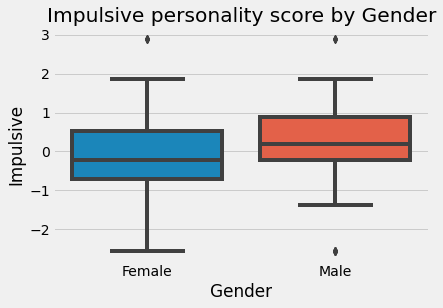

In [ ]:
# visualize to generate hypothesis
#demo_pers_plot(pers='Nscore', demo='Gender')
#demo_pers_plot(pers='Escore', demo='Gender')
#demo_pers_plot(pers='Oscore', demo='Gender')
#demo_pers_plot(pers='Ascore', demo='Gender')
#demo_pers_plot(pers='Cscore', demo='Gender')
demo_pers_plot(pers='Impulsive', demo='Gender')
#demo_pers_plot(pers='SS', demo='Gender')

**Null hypothesis:** male and female have the same Impulsive score on average.

**Alternative hypothesis:** male have a higher Impulsive score on average than female.

**Conclusion:** reject the null, and conclude male have a significantly higher Impulsive score on average than female.

Comparing means of:
        Impulsive
Gender           
Female  -0.152686
Male     0.166949
p_value: 0.0


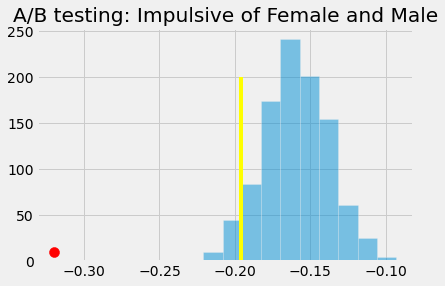

In [ ]:
# call the function to conduct the A/B testing
AB_testing(df=drug, pers='Impulsive', demo='Gender', A='Female', B='Male',
          reject_dir='left')

**Hypothesis Testing 2**

Null hypothesis: male and female have the same Escore on average.

Alternative hypothesis: male and femalea have significant different Escore on average.

Conclusion: reject the null, and conclude male and female have significantly different Escore on average.

Comparing means of:
          Escore
Gender          
Female  0.057569
Male   -0.057834
p_value: 0.008


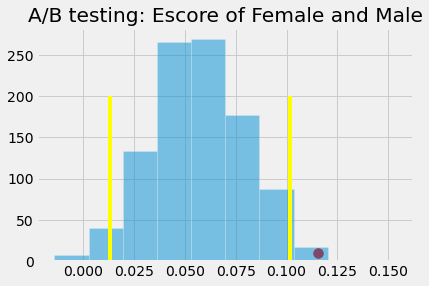

In [ ]:
# call the function to conduct the A/B testing
AB_testing(df=drug, pers='Escore', demo='Gender', A='Female', B='Male',
          reject_dir='both')

## Random Forest Classifier

Finally, we build a machine learning model to predict a drug consumption based on demographic and personality scores. We decide to engineer a response feature of 3 categories based on the 7 survey responses:
- never: never used
- light: used over a decade ago, in last decade or last year
- heavy: used in last month, week or day

We will use all the demographic and personality score as features. Because the demographic are all categorical, to avoid over-fitting, we will restrict a tuning parameter in the random forest model, to require the minimum number of samples at a leaf node to be at least 5. This can be achieved by setting the hyper parameter min_samples_leaf = 5. 

In [ ]:
# can change the drug_name to predict another one
drug_name = 'Cannabis'
y_dict = {0:'never', 1:'light', 2:'light', 3:'light', 
            4:'heavy', 5:'heavy', 6:'heavy'}
# create the response feature
y = drug[drug_name].replace(y_dict)

# create feature matrix
X = drug[demographic+personality]
# get all dummy encoding
X_dummy = pd.get_dummies(X)
# print out columns to make sure dummy encoding is correct
#X_dummy.columns 
# looks good

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2, random_state=2022)

from sklearn.ensemble import RandomForestClassifier
# let's grow 500 trees in the forest, this is one of the hyperparameters
# we are using all default choices of other hyperparameters 
model = RandomForestClassifier(n_estimators=500, min_samples_leaf=5)
# fit model on train data
model.fit(X_train, y_train)
# predict on both train and test data
y_train_hat = model.predict(X_train)
y_test_hat = model.predict(X_test)

In [ ]:
# Look at performance measure on both train and test sets:
from sklearn import metrics
print("Train data performance:")
print(metrics.classification_report(y_train, y_train_hat))
print("Test data performance:")
print(metrics.classification_report(y_test, y_test_hat))

Train data performance:
              precision    recall  f1-score   support

       heavy       0.80      0.90      0.85       615
       light       0.76      0.73      0.75       558
       never       0.86      0.71      0.78       335

    accuracy                           0.80      1508
   macro avg       0.81      0.78      0.79      1508
weighted avg       0.80      0.80      0.79      1508

Test data performance:
              precision    recall  f1-score   support

       heavy       0.76      0.84      0.80       173
       light       0.50      0.55      0.52       126
       never       0.58      0.36      0.44        78

    accuracy                           0.64       377
   macro avg       0.61      0.58      0.59       377
weighted avg       0.64      0.64      0.63       377



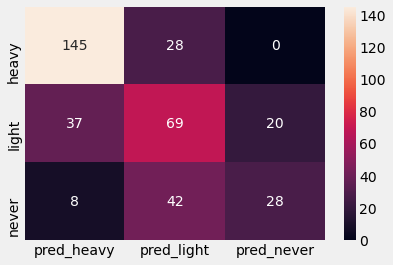

In [ ]:
# Look at confusion matrix on test set only
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_hat)
sns.heatmap(cm, annot=True, fmt='g',
            xticklabels=['pred_heavy','pred_light','pred_never'], 
            yticklabels=['heavy','light','never']);

Looking at the results of the random forest classifier, we notice the test set performance is quite decent in this case, only slightly worse than train set performance. In general, the model is able to predict Cannabis users with decent accuracy, in particular, for heavy users.  

# Discussion